# Import Data

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA

In [2]:
import seaborn as sns
sns.set()

In [3]:
def create_confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None, display_labels=None,
                           include_values=True, xticks_rotation='horizontal', values_format=None,
                           cmap='viridis', ax=None, colorbar=True):
    
    cm = confusion_matrix(y_true, y_pred)
    
    if display_labels is None:
        if labels is None:
            display_labels = unique_labels(y_true, y_pred)
        else:
            display_labels = labels

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=display_labels)
    return disp.plot(include_values=include_values,
                     cmap=cmap, ax=ax, xticks_rotation=xticks_rotation,
                     values_format=values_format)

In [4]:
df = pd.read_excel("/Users/samwwong/Desktop/Michael Zhang/pilo_ep_mb_features.xlsx")

# First Model (Pilo vs. Non-Pilo) - uses Lasso reduced features

In [5]:
first_target = df["path"]

In [6]:
first_target.value_counts()

mb      278
pilo    160
ep       97
Name: path, dtype: int64

In [7]:
reduced_features = pd.read_excel("/Users/samwwong/Desktop/Michael Zhang/LASSO_reduced_features.xlsx")

In [8]:
reduced_features_list = reduced_features.loc[reduced_features['MB/EP/Pilo'].isnull() == False, ['MB/EP/Pilo']].values.tolist()
reduced_features_list = [item for sublist in reduced_features_list for item in sublist]

In [9]:
first_target = first_target.map(dict(ep = 0, pilo = 1, mb = 2))

In [10]:
first_features = df[reduced_features_list]

In [11]:
first_features.head()

,t1_log-sigma-1-mm-3D_glcm_MCC,t1_log-sigma-1-mm-3D_glszm_GrayLevelVariance,t1_log-sigma-3-mm-3D_glszm_GrayLevelNonUniformityNormalized,t1_log-sigma-5-mm-3D_glszm_GrayLevelNonUniformity,t1_log-sigma-5-mm-3D_glszm_LargeAreaEmphasis,t1_log-sigma-5-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis,t1_log-sigma-5-mm-3D_glszm_SmallAreaEmphasis,t1_original_firstorder_Minimum,t1_original_shape_Elongation,t1_wavelet-HHL_firstorder_Skewness,...,t2_log-sigma-1-mm-3D_glrlm_LongRunHighGrayLevelEmphasis,t2_wavelet-HHL_glcm_Correlation,t2_wavelet-LLH_glcm_Idn,t2_wavelet-HHH_glszm_GrayLevelNonUniformityNormalized,t1_wavelet-HLH_glszm_GrayLevelNonUniformityNormalized,t1_wavelet-LLL_glszm_SizeZoneNonUniformity,t1_original_glcm_InverseVariance,t1_wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis,t2_wavelet-HLL_glcm_Imc2,t2_wavelet-HHH_glszm_SizeZoneNonUniformityNormalized
0,0.631381,5.157547,0.109631,38.884892,1.080805e+04,3.353478e+02,0.145560,-4.748235,0.892308,-0.069369,...,444.118002,-0.003377,0.969373,0.351562,0.185783,4187.047155,0.420038,0.003256,0.524616,0.265625
1,0.583517,13.048421,0.091918,4.722222,1.501618e+07,4.049815e+05,0.085116,-85.437437,0.911633,-0.428949,...,1469.701274,-0.010681,0.965242,0.137944,0.322314,2609.632464,0.397455,0.021619,0.716722,0.489890
2,0.546031,12.667014,0.149752,5.300000,1.249911e+07,2.752029e+06,0.073454,-46.531077,0.736559,0.208470,...,1168.409865,-0.028641,0.970563,0.408516,0.295000,1548.133685,0.431136,0.021926,0.621207,0.293411
3,0.570254,16.956034,0.063894,6.017857,7.504704e+06,1.043434e+05,0.112192,-113.373871,0.727540,0.078434,...,1212.157436,-0.020797,0.968940,0.464506,0.319632,11717.525195,0.358763,0.019926,0.600200,0.242670
4,0.528618,5.841492,0.131076,3.526316,3.929986e+07,1.569662e+06,0.053808,-37.166013,0.758718,-0.131720,...,920.359524,-0.009366,0.966726,0.358025,0.531250,912.724201,0.465345,0.073983,0.587429,0.203704


In [12]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(first_features, first_target, 
                                                   test_size = 0.25, random_state = 42)

In [13]:
y_train_1.value_counts()

2    218
1    115
0     68
Name: path, dtype: int64

In [14]:
y_test_1.value_counts()

2    60
1    45
0    29
Name: path, dtype: int64

In [15]:
first_X = pd.concat([X_train_1, y_train_1], axis = 1)
first_X_0 = first_X[first_X['path'] == 0]
first_X_1 = first_X[first_X['path'] == 1]
first_X_2 = first_X[first_X['path'] == 2]

In [16]:
upsampled_0 = resample(first_X_0, replace = True, n_samples = len(first_X_2), random_state = 42)
upsampled_1 = resample(first_X_1, replace = True, n_samples = len(first_X_2), random_state = 42)
upsampled = pd.concat([upsampled_0, upsampled_1, first_X_2])
upsampled = upsampled.sample(frac = 1, random_state = 42)

In [17]:
X_train_1 = upsampled.iloc[:, :-1]
y_train_1 = upsampled.iloc[:, -1]

In [18]:
y_train_1.value_counts()

2    218
1    218
0    218
Name: path, dtype: int64

In [19]:
y_train_bin = label_binarize(y_train_1, classes = [0, 1, 2])
y_test_bin = label_binarize(y_test_1, classes = [0, 1, 2])

y_train_1 = y_train_bin[:, 1]
y_test_1 = y_test_bin[:, 1]

In [20]:
names = X_train_1.columns
first_scaler = preprocessing.StandardScaler()

In [21]:
X_train_1 = first_scaler.fit_transform(X_train_1)
X_train_1 = pd.DataFrame(X_train_1, columns = names)

X_test_1 = first_scaler.transform(X_test_1)
X_test_1 = pd.DataFrame(X_test_1, columns = names)

In [22]:
lr_seq_1_model = LogisticRegression(penalty = 'l2', C = 1, max_iter = 2000, random_state = 42)

In [23]:
lr_seq_1_model.fit(X_train_1, y_train_1)
y_pred_1 = lr_seq_1_model.predict(X_test_1)

In [24]:
accuracy_score(y_pred_1, y_test_1)

0.9402985074626866

# Second Model (MB/EP) - uses all features then PCA (take top 60)

In [25]:
second_target = df["path"]

In [26]:
second_target.value_counts()

mb      278
pilo    160
ep       97
Name: path, dtype: int64

In [27]:
second_features = df.drop(['id', 'path'], axis = 1)

In [28]:
second_target = second_target.map(dict(ep = 0, pilo = -1, mb = 1))
second_target = second_target[second_target != -1]
second_features = second_features.iloc[second_target.index]

In [29]:
second_target.value_counts()

1    278
0     97
Name: path, dtype: int64

In [30]:
second_target = second_target.reset_index(drop = True)
second_features = second_features.reset_index(drop = True)

In [31]:
names = second_features.columns
second_scaler = preprocessing.StandardScaler()

second_features = second_scaler.fit_transform(second_features)
second_features = pd.DataFrame(second_features, columns = names)

In [32]:
second_pca = PCA(n_components=60, random_state = 42)

second_principalComponents = second_pca.fit_transform(second_features)
second_principaldf = pd.DataFrame(data = second_principalComponents)

In [40]:
second_principaldf.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-25.548536,-13.450027,5.799684,-0.881771,6.673722,-3.226103,-1.743113,-0.363189,0.533523,5.203355,...,-2.874023,1.167824,-1.991333,2.059639,-0.219616,0.652013,-0.977752,-1.487110,0.753129,-0.486300
1,-30.420208,-0.343499,18.636295,-12.455904,-11.038866,7.973012,-0.982330,-6.855145,-2.085637,-1.217958,...,-2.847318,1.977531,0.676035,0.397409,-0.624958,3.248757,1.366404,-1.683820,-1.546785,-1.167176
2,-11.360914,2.634126,-4.719078,-7.999355,4.699300,-2.332016,1.719329,-2.011132,-10.318054,-3.815599,...,0.709726,0.352946,-1.752533,0.123296,-0.742258,0.144875,-1.664786,0.872713,-0.485901,-0.486210
3,-49.388883,-14.171212,15.727680,1.371515,-6.694525,24.449944,-6.179586,-13.757560,-0.599769,1.322015,...,5.892583,0.622050,5.576365,-1.983500,-2.122576,2.483857,-0.331392,0.999967,0.633136,0.668785
4,-5.240770,1.247695,2.993072,-11.424567,7.185057,-9.148287,1.337924,-0.562060,5.618455,5.916989,...,-3.659275,0.599485,-0.396623,-0.694648,-0.409341,-0.260053,-1.595189,2.298257,3.875593,0.045962


In [49]:
dataviz = second_principaldf.iloc[:, :3]
dataviz["y"] = second_target
print('Explained variation per principal component: {}'.format(second_pca.explained_variance_ratio_))

Explained variation per principal component: [0.23952513 0.16190818 0.08734095 0.07732503 0.05093644 0.03382826
 0.02848965 0.02414281 0.02029057 0.01787475 0.01388387 0.01209103
 0.01087641 0.01062414 0.00897498 0.00808584 0.00764799 0.00739696
 0.00720814 0.00595647 0.00578981 0.00540462 0.00484905 0.00457497
 0.00440896 0.00393141 0.00384019 0.00359429 0.0034719  0.00333657
 0.00317794 0.00307193 0.00294227 0.00279328 0.00269109 0.00253393
 0.00252029 0.00237943 0.00224152 0.00215635 0.00207982 0.00204122
 0.0020168  0.00194053 0.00188713 0.00179872 0.00175078 0.0016979
 0.00163008 0.00160051 0.00153922 0.00147529 0.00143443 0.00137435
 0.00136563 0.00135436 0.00128101 0.0012455  0.0012065  0.00118022]


<ipython-input-49-bfebc9d60640>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataviz["y"] = second_target


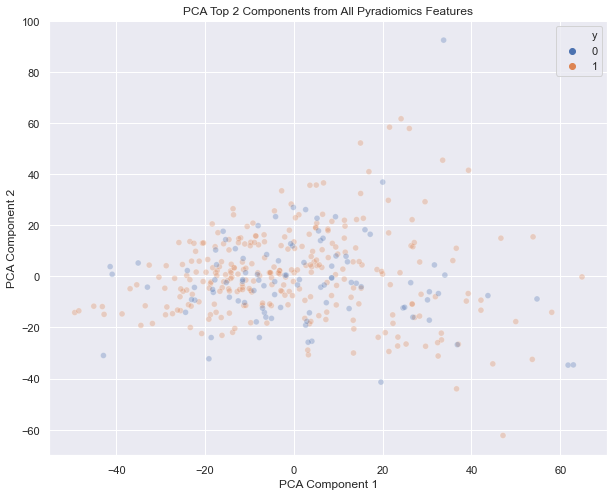

In [64]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x=0, y=1,
    hue = 'y',
    data=dataviz,
    legend="full",
    alpha=0.3
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Top 2 Components from All Pyradiomics Features')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 375 samples in 0.000s...
[t-SNE] Computed neighbors for 375 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 375 / 375
[t-SNE] Mean sigma: 7.301386
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.530045
[t-SNE] KL divergence after 300 iterations: 0.675374
t-SNE done! Time elapsed: 0.7027859687805176 seconds


<ipython-input-68-2d5f3102aabc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataviz['tsne-2d-one'] = tsne_results[:,0]
<ipython-input-68-2d5f3102aabc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataviz['tsne-2d-two'] = tsne_results[:,1]


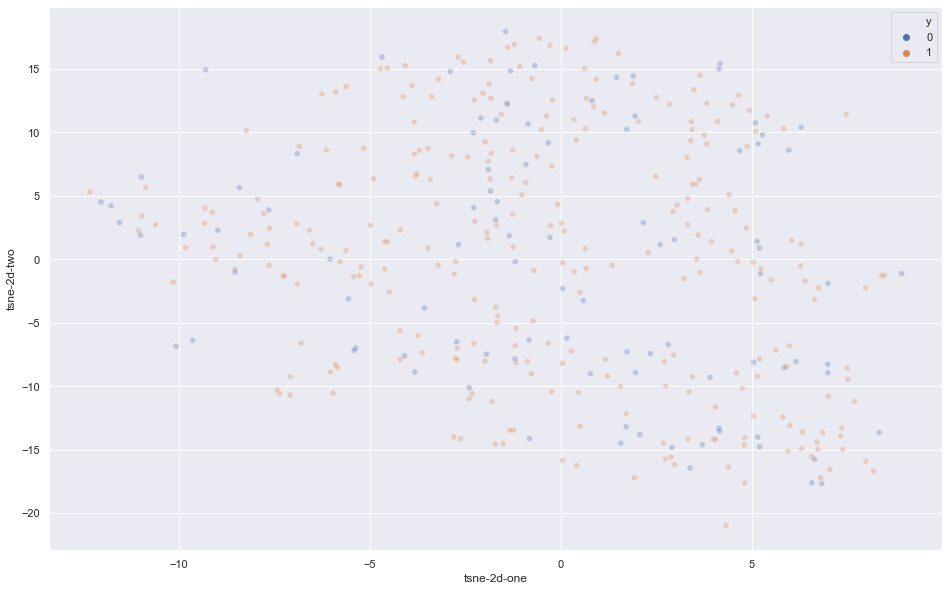

In [68]:
# import time
# from sklearn.manifold import TSNE

# time_start = time.time()
# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne_results = tsne.fit_transform(dataviz)
# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

# dataviz['tsne-2d-one'] = tsne_results[:,0]
# dataviz['tsne-2d-two'] = tsne_results[:,1]
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     hue= 'y',
#     data=dataviz,
#     legend="full",
#     alpha=0.3
# )

In [33]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(second_principaldf, second_target, 
                                                    test_size = 0.25, random_state = 42)

In [34]:
second_X = pd.concat([X_train_2, y_train_2], axis = 1)
second_X_0 = second_X[second_X['path'] == 0]
second_X_1 = second_X[second_X['path'] == 1]

In [35]:
second_upsampled_0 = resample(second_X_0, replace = True, n_samples = len(second_X_1), random_state = 42)
second_upsampled = pd.concat([second_upsampled_0, second_X_1])
second_upsampled = second_upsampled.sample(frac = 1, random_state = 42)

In [36]:
X_train_2 = second_upsampled.iloc[:, :-1]
y_train_2 = second_upsampled.iloc[:, -1]

In [37]:
lr_seq_2_model = LogisticRegression(penalty = 'l2', C = 1, max_iter = 2000, random_state = 42)

In [38]:
lr_seq_2_model.fit(X_train_2, y_train_2)
y_pred_2 = lr_seq_2_model.predict(X_test_2)

In [39]:
accuracy_score(y_pred_2, y_test_2)

0.8404255319148937

# Testing

In [40]:
test_features = df.drop(['id', 'path'], axis = 1) 
test_target = df["path"]

In [41]:
#mapping_dict = {0: 'ep', 1: 'pilo', 2: 'mb'}
test_target = test_target.map(dict(ep = 0, pilo = 1, mb = 2))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(test_features, test_target, 
                                                    test_size = 0.25, random_state = 42)

In [43]:
X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [44]:
X_test_reduced = X_test[reduced_features_list]

In [45]:
names = X_test_reduced.columns
X_test_for_first = first_scaler.transform(X_test_reduced)
X_test_for_first = pd.DataFrame(X_test_for_first, columns = names)

In [46]:
y_preds_after_first = lr_seq_1_model.predict(X_test_for_first)

In [47]:
pilo_indices = np.where(y_preds_after_first == 1)
other_indices = np.where(y_preds_after_first != 1)

In [48]:
pilo_preds = y_preds_after_first[pilo_indices]
y_test_for_pilo = np.array(y_test)[pilo_indices]

In [49]:
X_test_after_first_model = X_test.iloc[other_indices].reset_index(drop = True)
y_test_after_first_model = y_test.iloc[other_indices].reset_index(drop = True)

In [50]:
X_test_after_first_model = second_scaler.transform(X_test_after_first_model)
second_testprincipalComponents = second_pca.transform(X_test_after_first_model)
X_test_after_first_model = pd.DataFrame(data = second_testprincipalComponents)

In [51]:
y_test_after_first_model = np.array(y_test_after_first_model)
y_test_after_first_model[y_test_after_first_model == 1] = -1
y_test_after_first_model[y_test_after_first_model == 2] = 1

In [52]:
y_preds_after_second = lr_seq_2_model.predict(X_test_after_first_model)

In [53]:
accuracy_score(y_test_after_first_model, y_preds_after_second)

0.8526315789473684

In [54]:
y_preds_after_second[y_preds_after_second == 1] = 2

In [55]:
y_test_after_first_model[y_test_after_first_model == 1] = 2
y_test_after_first_model[y_test_after_first_model == -1] = 1

In [56]:
y_preds_overall = np.concatenate([y_preds_after_second, pilo_preds])
y_test_overall = np.concatenate([y_test_after_first_model, y_test_for_pilo])

In [57]:
accuracy_score(y_preds_overall, y_test_overall)

0.8880597014925373

In [61]:
sns.reset_orig()

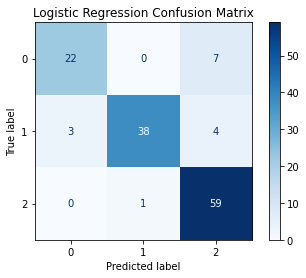

In [62]:
matrix = create_confusion_matrix(y_test_overall, y_preds_overall, cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show(matrix)
plt.show()

In [63]:
print(classification_report(y_test_overall, y_preds_overall))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81        29
           1       0.97      0.84      0.90        45
           2       0.84      0.98      0.91        60

    accuracy                           0.89       134
   macro avg       0.90      0.86      0.88       134
weighted avg       0.90      0.89      0.89       134

